In [5]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import pandas as pd
import seaborn as sns

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sns.set_context('talk', font_scale=1)

In [10]:
# input_file = '../../resources/distance/trf_reftss.bed'
# input_label = 'TRF'

In [ ]:
input_file = snakemake.input[0]
input_label = snakemake.wildcards['catalog']

In [11]:
df = pd.read_csv(input_file, sep='\t')
last_col = list(df.columns)[-1]
df = df[[last_col]]
df.columns = ['distance']


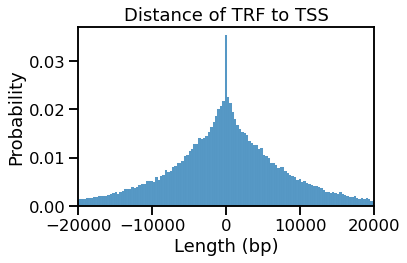

In [13]:
pdf = PdfPages(snakemake.output[0])
fig, ax = plt.subplots()
sns.histplot(x='distance', data=df, ax=ax, stat='probability')
ax.set_title('Distance of {} to TSS'.format(input_label))
ax.set_xlabel('Length (bp)')
ax.set_xlim(2*-10**4, 2*10**4)
plt.tight_layout()
pdf.savefig(fig)
pdf.close()